In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Converte csv para Pandas DataFrame
df = pd.read_csv('data.csv')

# Remove as colunas do DataFrame que não são interessantes para análise
df = df[["trestbps", "age", "sex", "chol", "fbs", "restecg"]]

df

,trestbps,age,sex,chol,fbs,restecg
0,145.0,63.0,1.0,233.0,1.0,2.0
1,160.0,67.0,1.0,286.0,0.0,2.0
2,120.0,67.0,1.0,229.0,0.0,2.0
3,130.0,37.0,1.0,250.0,0.0,0.0
4,130.0,41.0,0.0,204.0,0.0,2.0
...,...,...,...,...,...,...
298,110.0,45.0,1.0,264.0,0.0,0.0
299,144.0,68.0,1.0,193.0,1.0,0.0
300,130.0,57.0,1.0,131.0,0.0,0.0
301,130.0,57.0,0.0,236.0,0.0,2.0


In [145]:
# Recebe DataFrame e retorna lista contendo quantidade total de linhas no dataframe e quantidade de linhas onde 'sex' igual a 1 (masculino)
def get_total_and_sex(dataframe):

    total = len(dataframe)

    sex = list(dataframe["sex"])
    male_count = sex.count(1)

    return total, male_count


# Se 'chol' maior que 240.0, colesterol alto
highchol = get_total_and_sex(df[
    df["chol"] > 240.0
    ])

# Se 'fbs' igual a 1, positivo para alta taxa de açucar no sangue
fbs = get_total_and_sex(df[
    df["fbs"] == 1
    ])

# Se 'restecg' igual a 2, positivo para HVE (Hipertrofia Ventricular Esquerda)
leftvh = get_total_and_sex(df[
    (df['restecg'] == 2)
    ])

# Ambos colesterol alto e açucar no sangue
highchol_fbs = get_total_and_sex(df[
    (df['chol'] > 240.0) & 
    (df['fbs'] == 1)
    ])

# Ambos colesterol alto, açucar no sangue e HVE
highchol_fbs_leftvh = get_total_and_sex(df[
    (df['chol'] > 240.0) & 
    (df['fbs'] == 1) & 
    (df['restecg'] == 2)
    ])

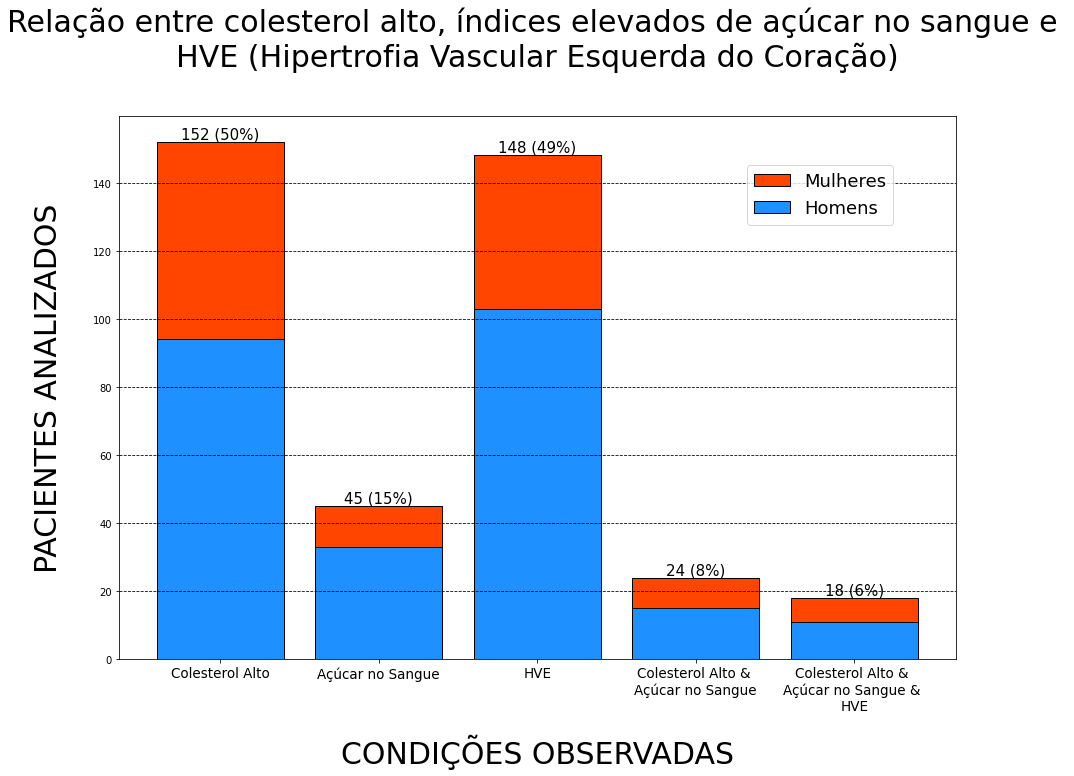

In [146]:
# Matplotlib part
fig, ax = plt.subplots()
fig.set_size_inches([15,10])
rcParams['font.family'] = 'sans-serif'

# Plota gráfico de barras em laranja (total de homens e mulheres)
x_axis = np.array(["Colesterol Alto", "Açúcar no Sangue", "HVE", "Colesterol Alto & \nAçúcar no Sangue", "Colesterol Alto & \nAçúcar no Sangue & \nHVE"])
y_axis = np.array([highchol[0], fbs[0], leftvh[0], highchol_fbs[0], highchol_fbs_leftvh[0]])
ax.bar(x_axis, y_axis, color=['orangered'], edgecolor="black")

# Adiciona anotações no topo das barras
for bar in ax.patches:
  # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done:
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  bar_height = int(bar.get_height())
  ax.annotate(f"{bar_height} ({round(bar_height/total*100)}%)",
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

# Plota gráfico de barras azul (apenas homens) por cima do anterior
y2_axis = np.array([highchol[1], fbs[1], leftvh[1], highchol_fbs[1], highchol_fbs_leftvh[1]])
ax.bar(x_axis, y2_axis, color=['dodgerblue'], edgecolor="black")

# Titulos e outros detalhes do gráfico
ax.set_title("Relação entre colesterol alto, índices elevados de açúcar no sangue e \nHVE (Hipertrofia Vascular Esquerda do Coração)", size=30, pad=50)
ax.set_xlabel("CONDIÇÕES OBSERVADAS", size=30, labelpad=20)
ax.set_ylabel("PACIENTES ANALIZADOS", size=30, labelpad=30)
ax.grid(axis='y', color='black', linestyle ='--')

# Legenda
ax.legend(["Mulheres", "Homens"], fontsize=18, loc=[0.75,0.80])

plt.xticks(size=13.5, ha="center", rotation_mode="anchor")
plt.show()


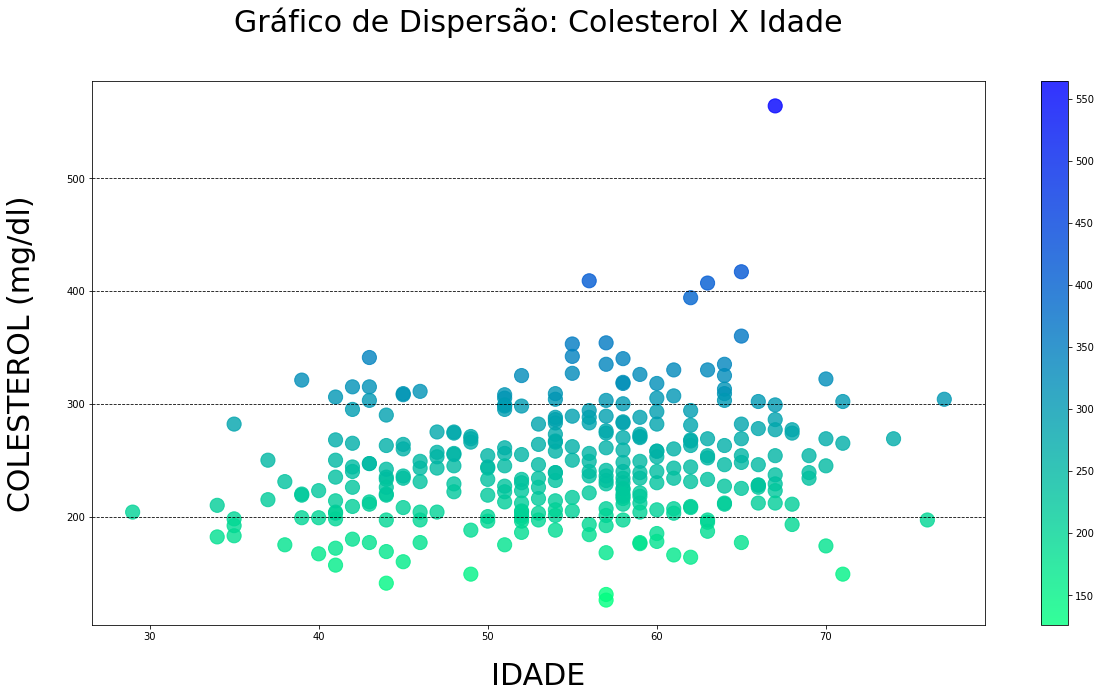

In [195]:
# Recupera as colunas do dataframe necessárias para a análize com List Comprehension
chol = [int(i) for i in df["chol"]]
ages = [int(i) for i in df["age"]]
trestbps = [int(i) for i in df["trestbps"]]

# Cria subplot
fig, ax = plt.subplots()
fig.set_size_inches([20,10])
rcParams['font.family'] = 'sans-serif'

# Plota gráfico de dispersão com ColorMap
x_axis = ages
y_axis = chol
im = ax.scatter(x_axis, y_axis, c=y_axis, s=200, alpha=0.8, cmap="winter_r")

# Titulos e labels detalhes do gráfico
ax.set_title("Gráfico de Dispersão: Colesterol X Idade", size=30, pad=50)
ax.set_xlabel("IDADE", size=30, labelpad=20)
ax.set_ylabel("COLESTEROL (mg/dl)", size=30, labelpad=30)
ax.grid(axis='y', color='black', linestyle ='--')

# Colorbar
cb = plt.colorbar(im)

plt.show()


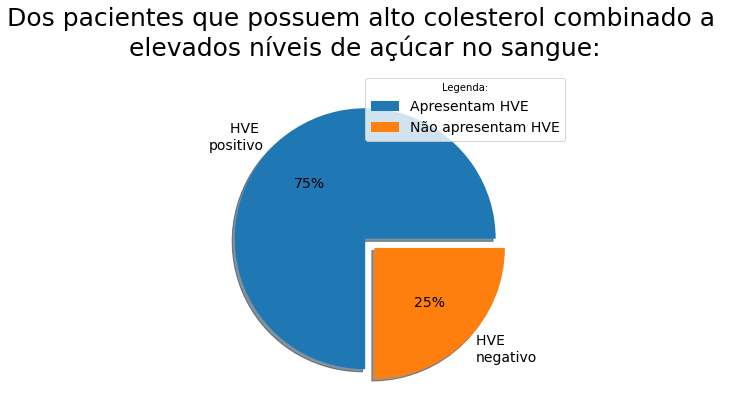

In [189]:
reminder = highchol_fbs[0] - highchol_fbs_leftvh[0]
x = np.array([highchol_fbs_leftvh[0], reminder])

rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(8, 6), facecolor="white")

plt.pie(x, labels=["HVE \npositivo", "HVE \nnegativo"], explode=[0, 0.1], shadow=True, autopct=lambda pct: f"{round(pct)}%", textprops={"fontsize": 14})
plt.title("Dos pacientes que possuem alto colesterol combinado a \nelevados níveis de açúcar no sangue:", size=25, pad=20)
plt.legend(title = "Legenda:", labels=["Apresentam HVE", "Não apresentam HVE"], loc=[0.5,0.8], fontsize=14)
plt.show() 